In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../logs/system_evaluation/Roboflow_dataset_V1/results_df.csv")
df.head()

Unnamed: 0                                               path  true_label  \
0           0  /Users/ahmedalkhulayfi/Downloads/Roboflow_data...           1   
1           1  /Users/ahmedalkhulayfi/Downloads/Roboflow_data...           1   
2           2  /Users/ahmedalkhulayfi/Downloads/Roboflow_data...           1   
3           3  /Users/ahmedalkhulayfi/Downloads/Roboflow_data...           1   
4           4  /Users/ahmedalkhulayfi/Downloads/Roboflow_data...           1   

   predicted_label  
0                1  
1                1  
2                1  
3                1  
4                1

Accuracy: 0.9512

Confusion Matrix:
[[662  64]
 [  6 702]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       726
           1       0.92      0.99      0.95       708

    accuracy                           0.95      1434
   macro avg       0.95      0.95      0.95      1434
weighted avg       0.95      0.95      0.95      1434



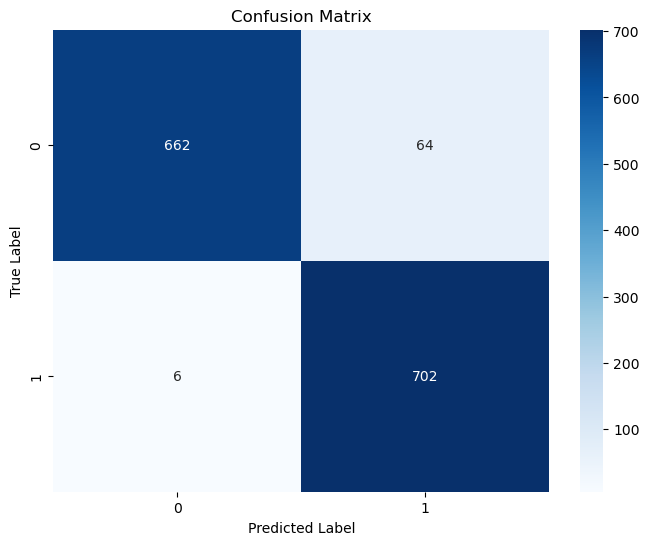

Class 1 accuracy: 0.9915
Class 0 accuracy: 0.9118


In [3]:
# Calculate accuracy, confusion matrix, and other metrics
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(df['true_label'], df['predicted_label'])

# Calculate confusion matrix
cm = confusion_matrix(df['true_label'], df['predicted_label'])

# Calculate classification report
report = classification_report(df['true_label'], df['predicted_label'])

# Print results
print(f"Accuracy: {accuracy:.4f}\n")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# Visualize confusion matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate and display class-wise accuracy
class_accuracy = {}
for label in df['true_label'].unique():
    mask = df['true_label'] == label
    class_acc = accuracy_score(df[mask]['true_label'], df[mask]['predicted_label'])
    class_accuracy[label] = class_acc
    print(f"Class {label} accuracy: {class_acc:.4f}")
    
#? Class 1 (Drowsy):
#?- Recall: 0.40 (We're missing 60% of drowsy cases!)
#? - Precision: 0.98 (When we predict drowsy, we're usually right)

I0000 00:00:1738222460.637506   42857 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1738222460.641241   62405 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1738222460.644424   42857 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
W0000 00:00:1738222460.646028   62413 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1738222460.651658   62416 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1738222460.794940   62419 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIME


Image: 407_jpg.rf.21e9b6260e0bd71d02feef41dbf973de.jpg
True label: Drowsy
Predicted: Not Drowsy


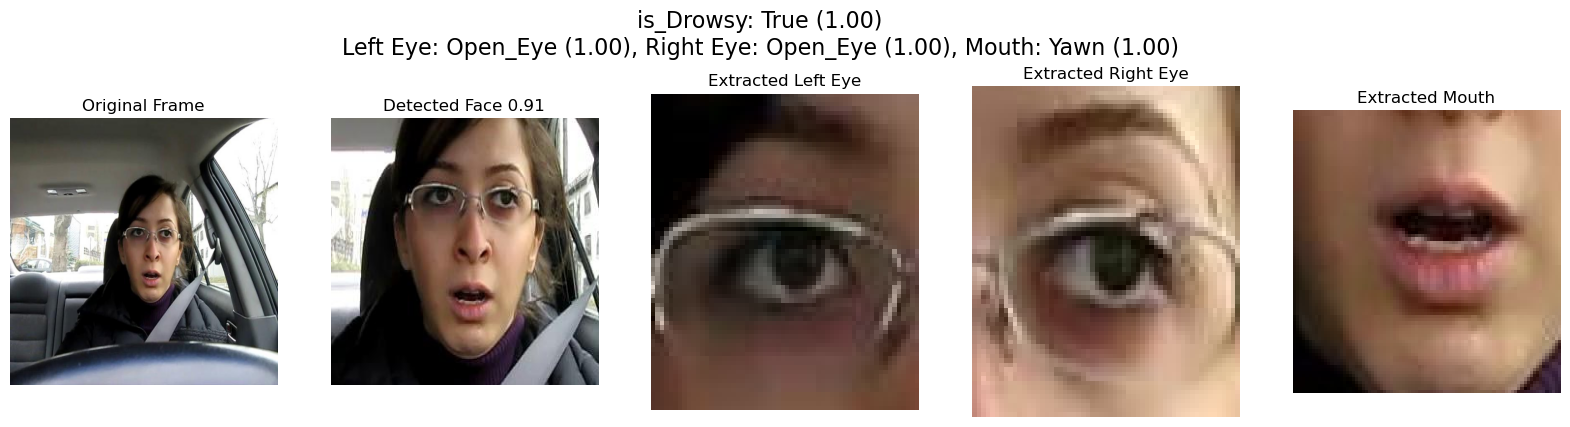


Image: 419_jpg.rf.fee5d6e42699bbfb548741f1f2d519e9.jpg
True label: Drowsy
Predicted: Not Drowsy


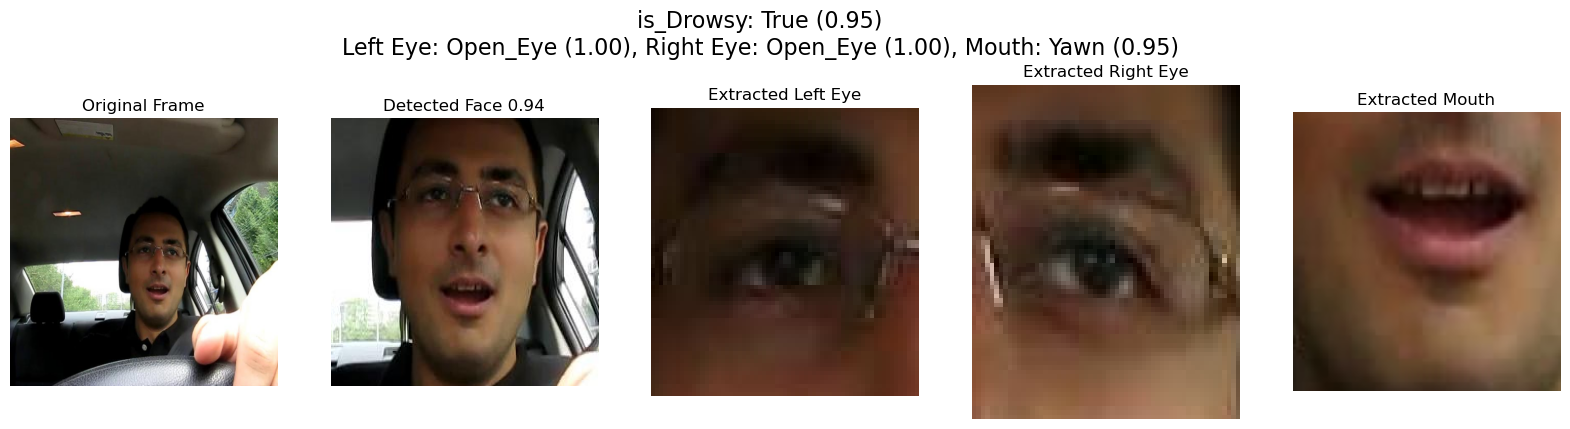


Image: 465_jpg.rf.a2965c24b80867dd06a7f12c4dd63b7e.jpg
True label: Drowsy
Predicted: Not Drowsy


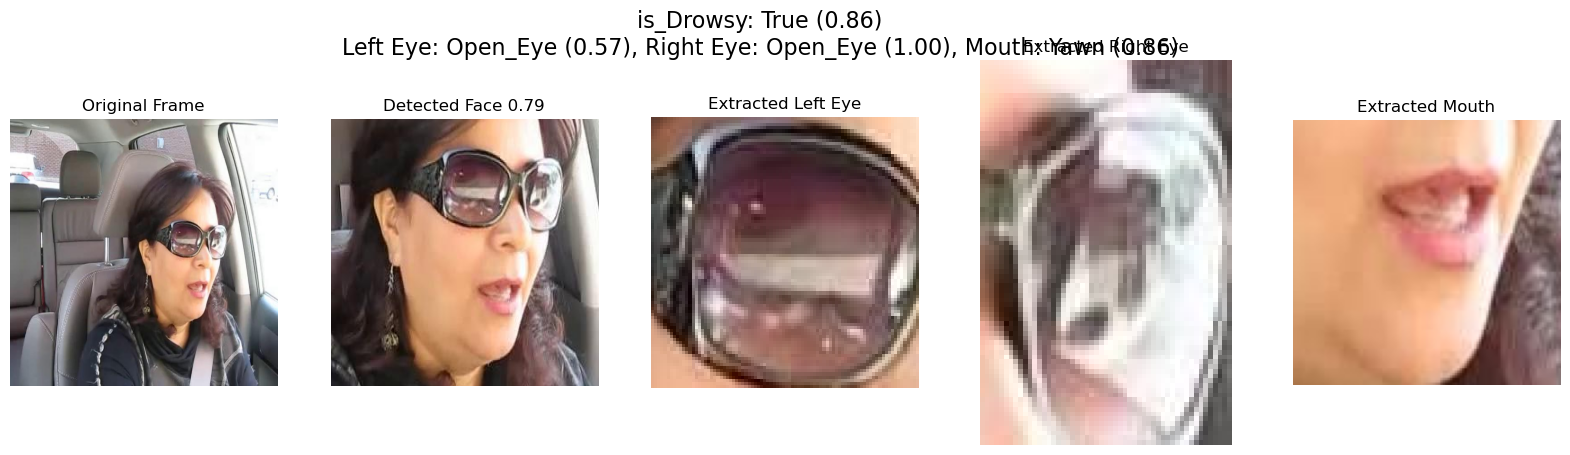


Image: 201_jpg.rf.433053fb0591e8a38d9e21a7a59e2029.jpg
True label: Drowsy
Predicted: Not Drowsy


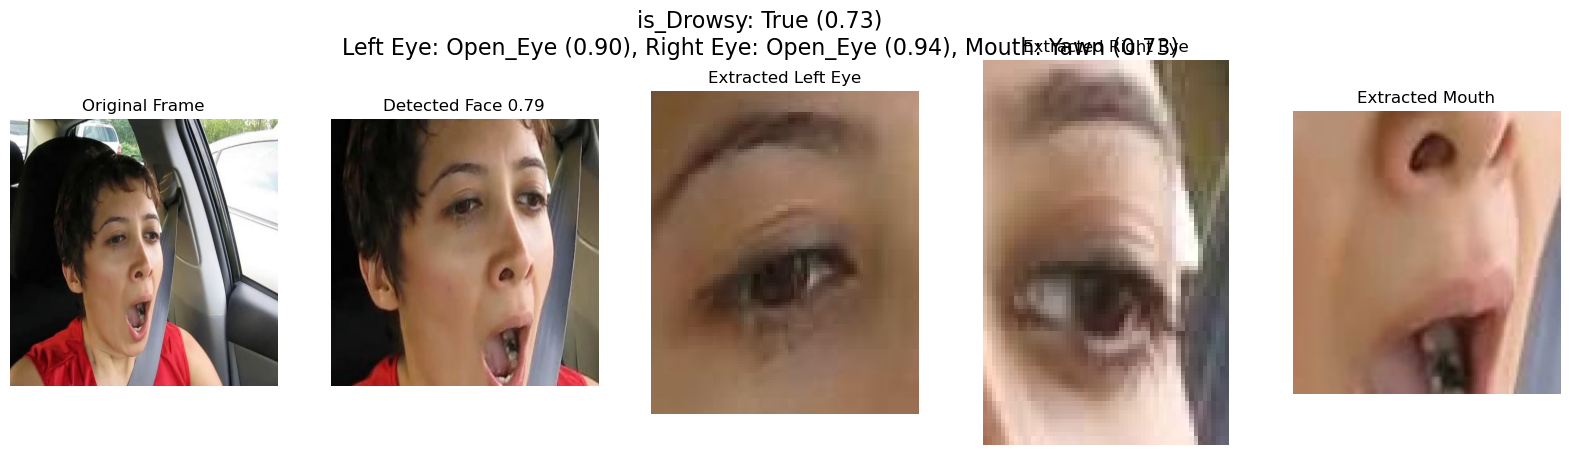


Image: 19_jpg.rf.9493ca7dea47115635a1a0221bbdc334.jpg
True label: Drowsy
Predicted: Not Drowsy


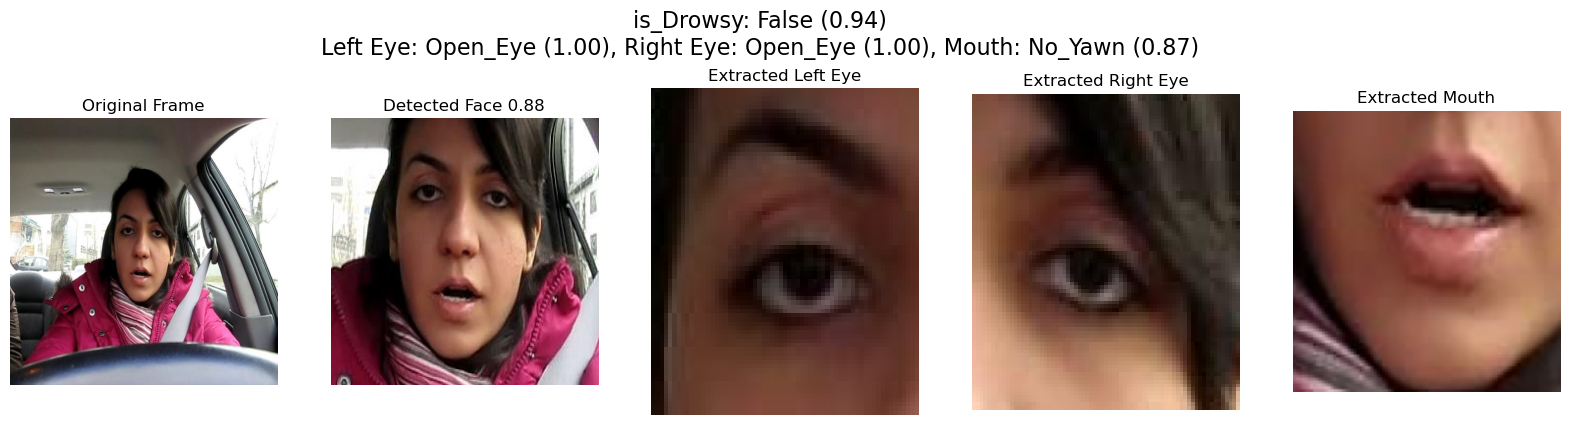


Image: 529_jpg.rf.991226b8cebdc757e34cba24d2b024f1.jpg
True label: Not Drowsy
Predicted: Drowsy


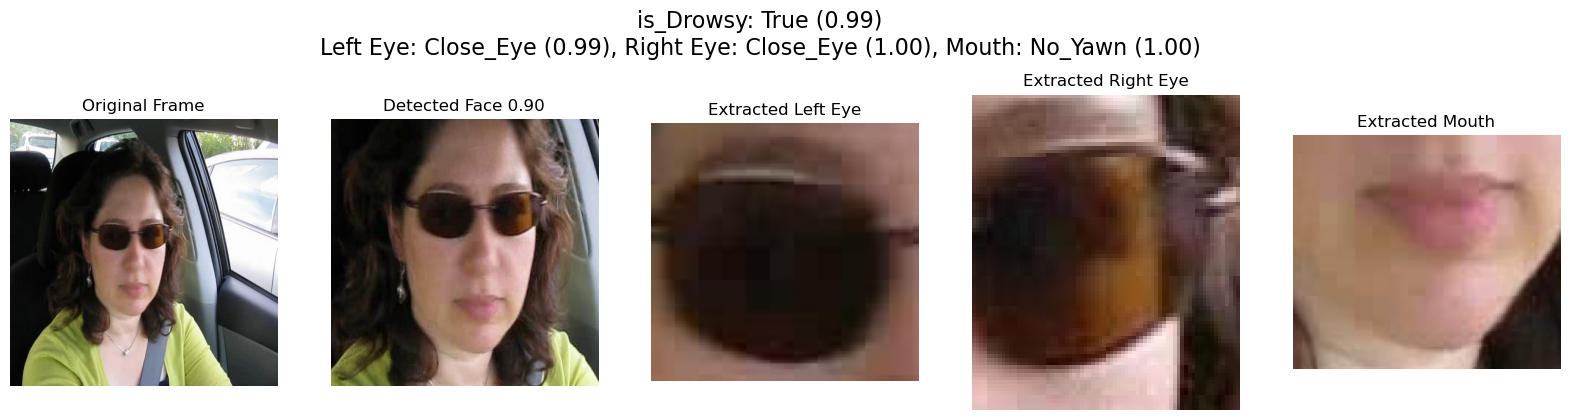


Image: 450_jpg.rf.b0e173e7bc5377b34a2ecd46bc30b1a6.jpg
True label: Not Drowsy
Predicted: Drowsy


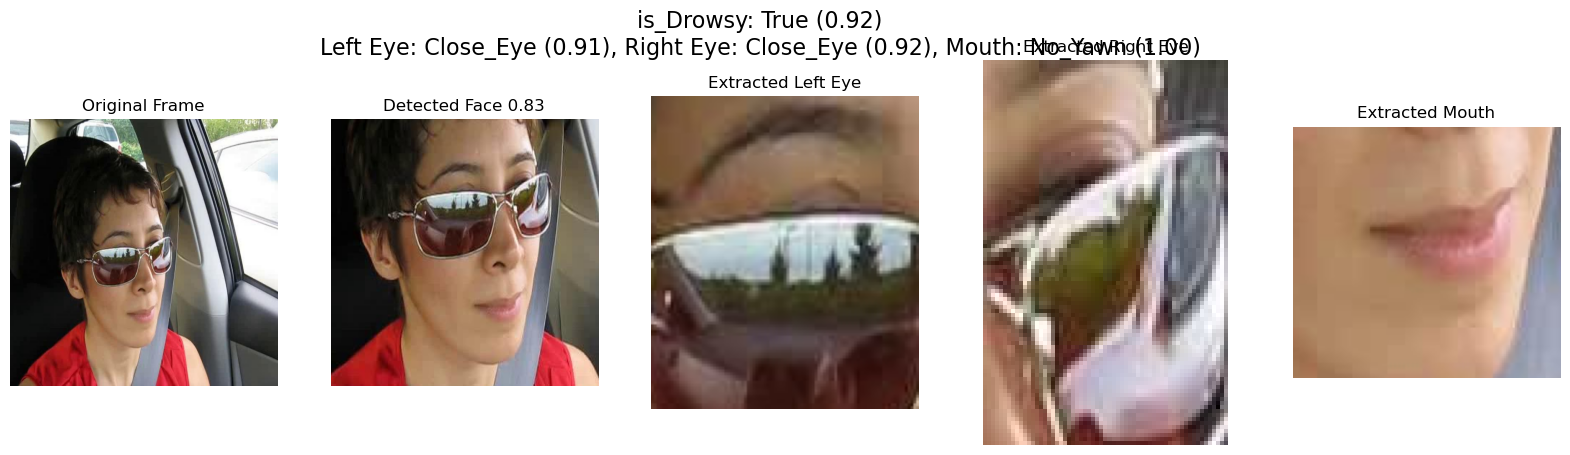


Image: 1374_jpg.rf.7a92dc8c1fc06c7079a51a9772371c3c.jpg
True label: Not Drowsy
Predicted: Drowsy


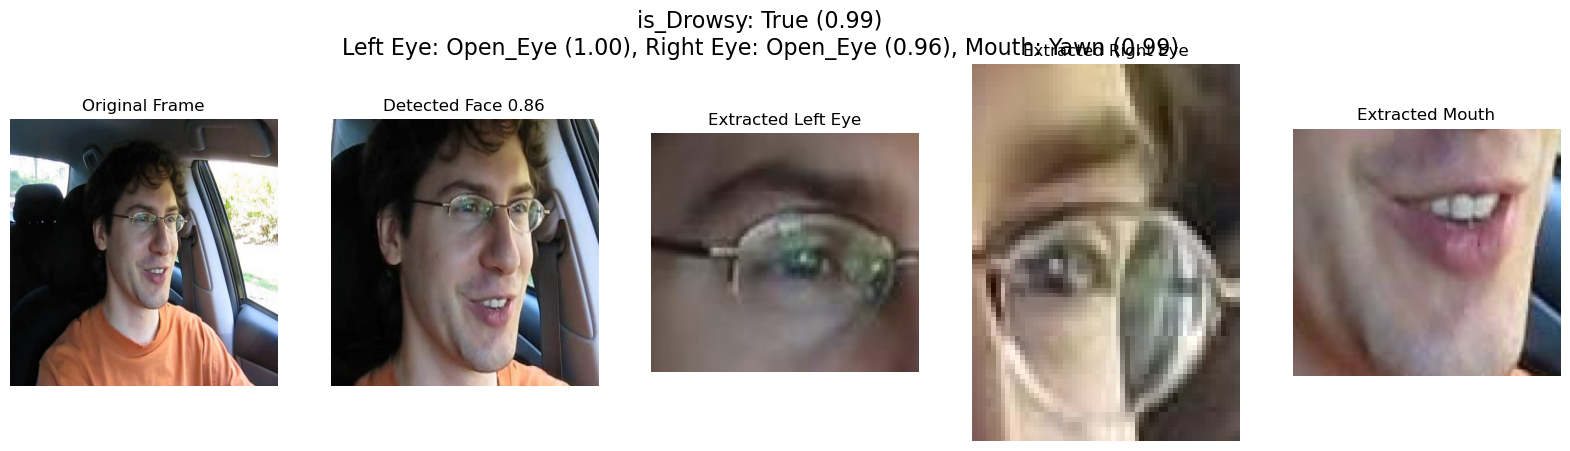


Image: 510_jpg.rf.785fdcc4961e029007a02571bf8b7787.jpg
True label: Not Drowsy
Predicted: Drowsy


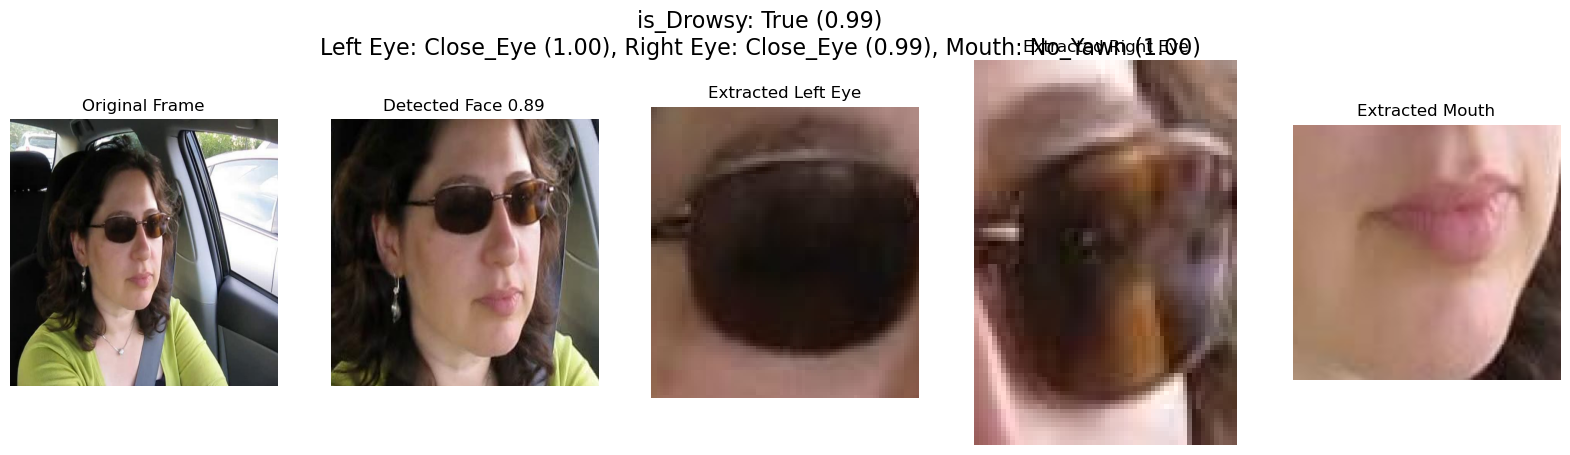


Image: 1067_jpg.rf.26cf4062ceba4cb42e505963ab1533c3.jpg
True label: Not Drowsy
Predicted: Drowsy


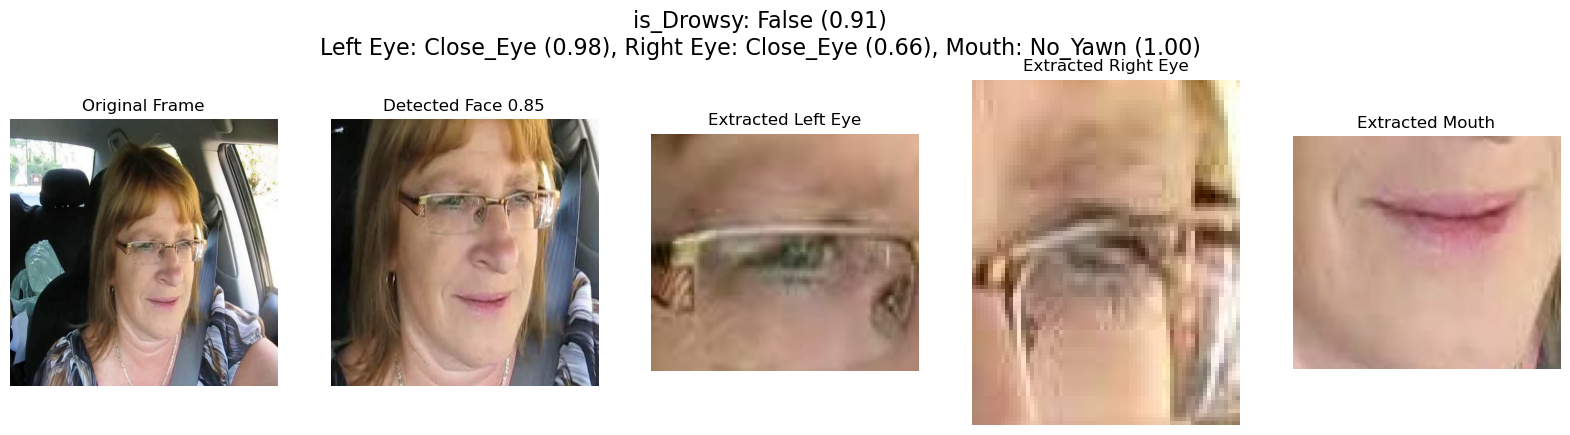


Image: 149_jpg.rf.708b1c34086179ea3c1e07bbc71db079.jpg
True label: Not Drowsy
Predicted: Not Drowsy


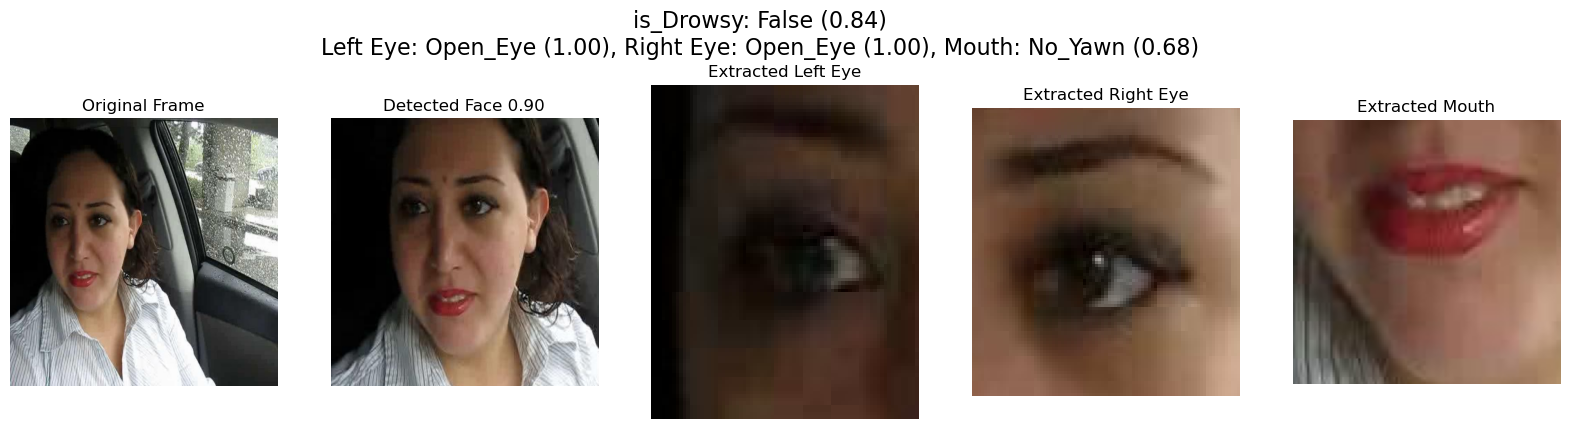


Image: 2056_jpg.rf.e97945b9dcf99cb164f3ab4598e49592.jpg
True label: Not Drowsy
Predicted: Not Drowsy


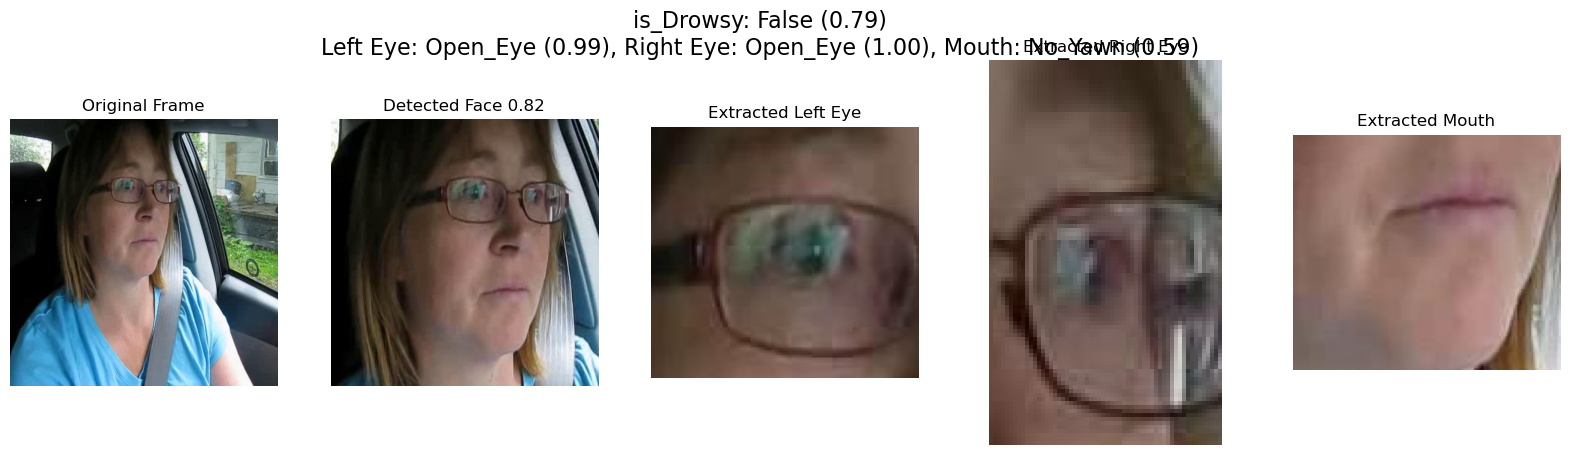


Image: 488_jpg.rf.5a5c5799358fa3d088720a556337bbd0.jpg
True label: Drowsy
Predicted: Drowsy


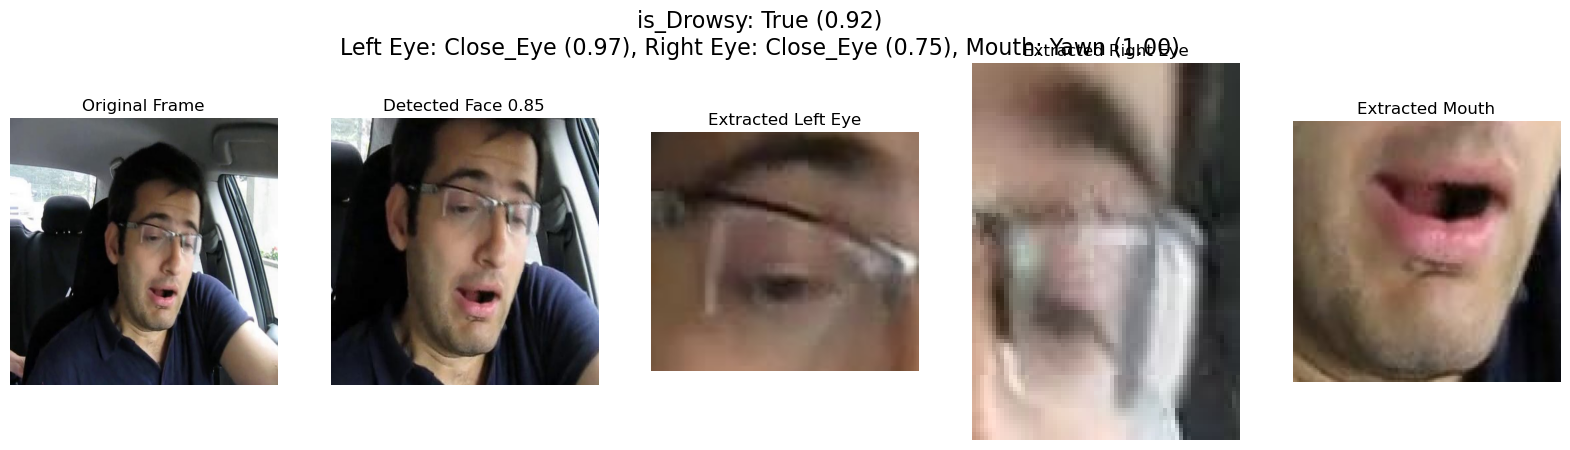


Image: 543_jpg.rf.611de80904109f0bd70bca8b3e0788ee.jpg
True label: Not Drowsy
Predicted: Not Drowsy


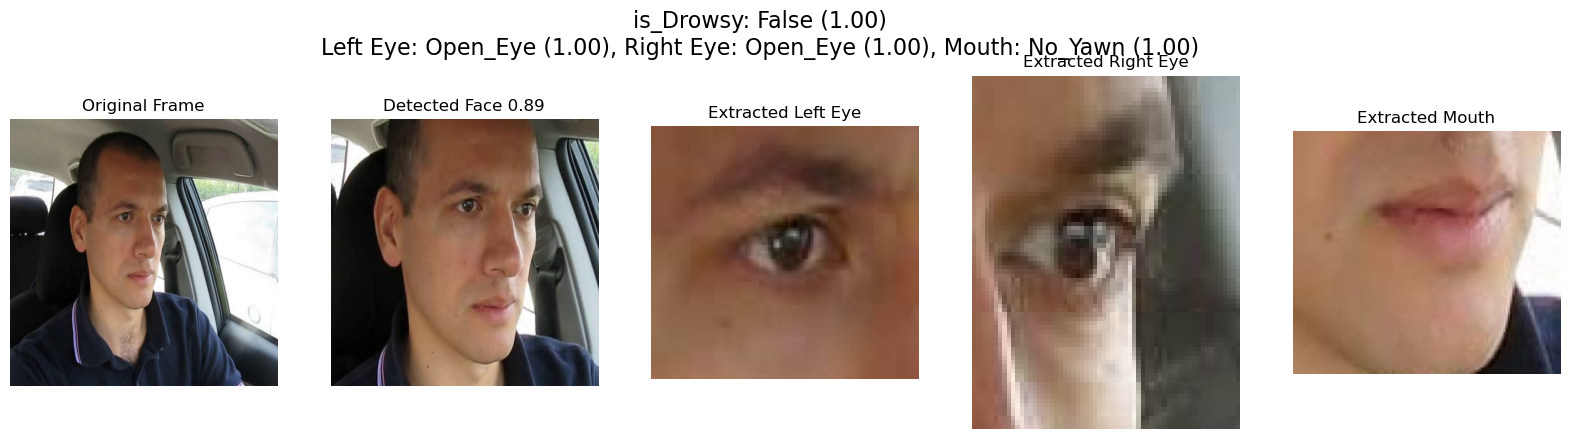


Image: 2479_jpg.rf.d26f245b9400c80989304e431d99ae08.jpg
True label: Not Drowsy
Predicted: Not Drowsy


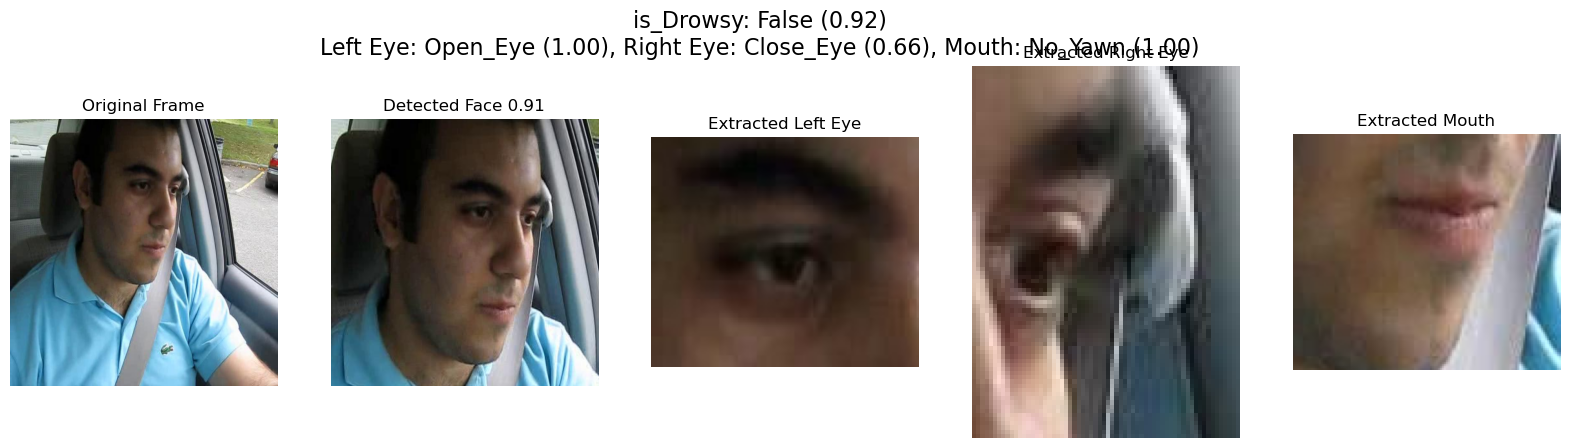

In [ ]:
# Add new cell for visualization
import cv2
from detection.face_detection import FaceDetection
from detection.feature_extraction import FeatureExtraction
from detection.state_classification import StateClassification
from detection.decision_logic import DecisionLogic
from detection.config import Config
from visualization.plot_results import plot_pipeline
import os

def visualize_sample_predictions(df, num_samples=5):
    # Initialize components
    config = Config()
    face_detector = FaceDetection(config.FACE_DETECTION_CONFIDENCE, 
                                config.FACE_DETECTION_MODEL_SELECTION, 
                                config.FACE_PADDING_PERCENT)
    feature_extractor = FeatureExtraction(config.STATIC_IMAGE_MODE, 
                                        config.MAX_NUM_FACES, 
                                        config.REFINE_LANDMARKS, 
                                        config.MIN_DETECTION_CONF, 
                                        config.MIN_TRACKING_CONF)
    state_classifier = StateClassification(config.EYE_MODEL_PATH, 
                                        config.MOUTH_MODEL_PATH, 
                                        config.DEVICE)
    decision_logic = DecisionLogic(config.EYE_CONFIDENCE_THRESHOLD, 
                                 config.MOUTH_CONFIDENCE_THRESHOLD, 
                                 config.MIN_CONFIDENCE)

    # Get some interesting samples (e.g., false positives, false negatives)
    false_negatives = df[(df['true_label'] == 1) & (df['predicted_label'] == 0)]
    false_positives = df[(df['true_label'] == 0) & (df['predicted_label'] == 1)]
    correct_predictions = df[df['true_label'] == df['predicted_label']]

    samples = pd.concat([
        false_negatives.sample(min(num_samples, len(false_negatives))),
        false_positives.sample(min(num_samples, len(false_positives))),
        correct_predictions.sample(min(num_samples, len(correct_predictions)))
    ])

    for _, row in samples.iterrows():
        # Load and process image
        frame = cv2.imread(row['path'])
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        face_result = face_detector.detect_face(frame)
        
        if face_result.success:
            facial_features = feature_extractor.process_face(face_result)
            states = state_classifier.process_features(facial_features)
            decision = decision_logic.determine_drowsiness(states)
            
            # Add prediction information to title
            print(f"\nImage: {os.path.basename(row['path'])}")
            print(f"True label: {'Drowsy' if row['true_label'] == 1 else 'Not Drowsy'}")
            print(f"Predicted: {'Drowsy' if row['predicted_label'] == 1 else 'Not Drowsy'}")
            
            # Plot the pipeline visualization
            plot_pipeline(frame, face_result, facial_features, states, decision)

# Call the visualization function
visualize_sample_predictions(df, num_samples=5)
#  407_jpg.rf.21e9b6260e0bd71d02feef41dbf973de.jpg